In [ ]:
#columnas_seleccionadas = [
   # 'action_taken2', 'purchaser_type', 'preapproval',
    #'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open_end_line_of_credit', 'business_or_commercial_purpose' 'loan_amount', 'hoepa_status',
    #'occupancy_type', 'applicant_credit_score_type','combined_loan_to_value_ratio', 'property_value ','occupancy_type ','manufactured_home_secured_proper',
    #'applicant_age', 'hoepa_status ', 'loan_term ','manufactured_home_land_property', 'multifamily_affordable_units','income ','applicant_credit_score_type'
    #'conforming_loan_limit', 'derived_loan_product_type', 'applicant_sex '

# CARGA INFORMACION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Reemplaza la ruta con la ubicación de tu archivo Stata (.dta)
file_path = "/content/drive/MyDrive/Proyecto Grado/HDMA/Version Final/LAR_18_19_Muestra.dta"

# Cargar el archivo Stata en un DataFrame
data = pd.read_stata(file_path)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   activity_year                     1000000 non-null  int16   
 1   lei                               1000000 non-null  object  
 2   state_code                        1000000 non-null  object  
 3   county_code                       1000000 non-null  object  
 4   action_taken                      1000000 non-null  category
 5   purchaser_type                    1000000 non-null  category
 6   preapproval                       1000000 non-null  int8    
 7   loan_type                         1000000 non-null  category
 8   loan_purpose                      1000000 non-null  category
 9   lien_status                       1000000 non-null  int8    
 10  reverse_mortgage                  973978 non-null   float64 
 11  open_end_line_of_credit  

In [ ]:
categorias_columna1 = data['applicant_sex'].unique()
categorias_columna2 = data['applicant_race_1'].unique()
categorias_columna3 = data['applicant_ethnicity_1'].unique()
categorias_columna4 = data['applicant_age_above_62'].unique()

print("Categorías únicas en applicant_sex :", categorias_columna1)
print("Categorías únicas en applicant_race_1:", categorias_columna2)
print("Categorías únicas en applicant_ethnicity_1:", categorias_columna3)
print("Categorías únicas en applicant_age_above_62:", categorias_columna4)


Categorías únicas en applicant_sex : ['mujer', 'hombre', 'selecciono ambas opciones']
Categories (3, object): ['hombre' < 'mujer' < 'selecciono ambas opciones']
Categorías únicas en applicant_race_1: ['negro/afroamericano', 'blanco', 'sin info', 'asiatico', 'nativo americano/alaska', ..., 'koreano', 'guameno o chamorro', 'japones', 'samoan', 'hawaiano']
Length: 18
Categories (18, object): ['nativo americano/alaska' < 'asiatico' < 'negro/afroamericano' <
                          'hawaiano/isleno del pacifico' ... 'hawaiano' < 'guameno o chamorro' < 'samoan' <
                          'otro isleno del pacifico']
Categorías únicas en applicant_ethnicity_1: ['no hispano/latino', 'hispano/latino', 'sin info', 'mexicano', 'otro hispano/latino', 'cubano', 'puertorriqueno', NaN, 'no aplica']
Categories (8, object): ['hispano/latino' < 'no hispano/latino' < 'sin info' < 'no aplica' < 'mexicano' <
                         'puertorriqueno' < 'cubano' < 'otro hispano/latino']
Categorías únicas e

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken2']
print(columna_original)


0                negado
1              aprobado
2              aprobado
3              aprobado
4         no finalizado
              ...      
999995         aprobado
999996         aprobado
999997         aprobado
999998         aprobado
999999         aprobado
Name: action_taken2, Length: 1000000, dtype: category
Categories (3, object): ['aprobado' < 'negado' < 'no finalizado']


# PREPARACION DATA SET PARA FASE MODELOS

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

In [ ]:
# Eliminación de variables que tengan valores nulos
#df1 = data.dropna(axis=1)

# Eliminación de tres columnas adicionales específicas
columnas_adicionales = ['lei', 'state_code', 'county_code', 'activity_year']
#df1 = df1.drop(columnas_adicionales, axis=1)


In [ ]:
# Guardar la correspondencia de clases para 'action_taken2'
correspondencia_original_action_taken2 = dict(zip(data['action_taken2'].unique(), data['action_taken2'].unique()))
print("Correspondencia de clases original para 'action_taken2':")
print(correspondencia_original_action_taken2)


Correspondencia de clases original para 'action_taken2':
{'negado': 'negado', 'aprobado': 'aprobado', 'no finalizado': 'no finalizado'}


In [ ]:
# Convertir valores de action_taken2 a minúsculas
data['action_taken2'] = data['action_taken2'].str.lower()

# Mapeo de los valores de action_taken2 a los valores correspondientes en action_taken3
mapping = {
    'aprobado': 'Otorgado',
    'negado': 'No Otorgado',
    'no finalizado': 'No Otorgado'
}

# Crear la nueva columna action_taken3 basada en los valores de action_taken2
data['action_taken3'] = data['action_taken2'].replace(mapping)

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken3']
print(columna_original)

0         No Otorgado
1            Otorgado
2            Otorgado
3            Otorgado
4         No Otorgado
             ...     
999995       Otorgado
999996       Otorgado
999997       Otorgado
999998       Otorgado
999999       Otorgado
Name: action_taken3, Length: 1000000, dtype: object


In [ ]:
# Convertir valores a cadenas y guardar los originales en nuevas columnas
columns_to_check = ['protegido_edad', 'no_protegido_edad', 'protegido_mujer', 'no_protegido_hombre', 'protegido_raza', 'no_protegido_raza']

for column in columns_to_check:
    # Crear una nueva columna con el nombre original + '_antes_conversion'
    data[column + '_antes_conversion'] = data[column]
    # Convertir los valores a numéricos
    data[column] = pd.to_numeric(data[column], errors='coerce')

import numpy as np

# Crear la nueva columna 'poblacion_protegida' basada en las condiciones
data['poblacion_protegida'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)

# Crear una nueva columna 'poblacion_protegida_nueva' basada en las condiciones
data['poblacion_protegida_nueva'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   activity_year                         1000000 non-null  int16   
 1   lei                                   1000000 non-null  object  
 2   state_code                            1000000 non-null  object  
 3   county_code                           1000000 non-null  object  
 4   action_taken                          1000000 non-null  category
 5   purchaser_type                        1000000 non-null  category
 6   preapproval                           1000000 non-null  int8    
 7   loan_type                             1000000 non-null  category
 8   loan_purpose                          1000000 non-null  category
 9   lien_status                           1000000 non-null  int8    
 10  reverse_mortgage                      97397

# CREACION DE DATA SET PARA MODELOS

In [ ]:
# Crear un nuevo DataFrame con solo las columnas seleccionadas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Lista de columnas seleccionadas
columnas_seleccionadas = ['action_taken3', 'income', 'applicant_sex', 'loan_amount', 'loan_purpose', 'loan_type', 'debt_to_income_ratio','combined_loan_to_value_ratio']
df = data[columnas_seleccionadas].copy()


# Usar LabelEncoder para transformar la columna 'action_taken2'

label_encoder_action_taken3 = LabelEncoder()
df['action_taken3'] = label_encoder_action_taken3.fit_transform(df['action_taken3'])

# Convertir variables categóricas a numéricas y mapear clases de 'action_taken2' a números
label_encoder = LabelEncoder()
#df['purchaser_type'] = label_encoder.fit_transform(df['purchaser_type'])
#df['preapproval'] = label_encoder.fit_transform(df['preapproval'])
df['loan_type'] = label_encoder.fit_transform(df['loan_type'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
#df['lien_status'] = label_encoder.fit_transform(df['lien_status'])
#f['hoepa_status'] = label_encoder.fit_transform(df['hoepa_status'])
#df['occupancy_type'] = label_encoder.fit_transform(df['occupancy_type'])
#df['applicant_credit_score_type'] = label_encoder.fit_transform(df['applicant_credit_score_type'])
#df['manufactured_home_land_property_'] = label_encoder.fit_transform(df['manufactured_home_land_property_'])
df['applicant_sex'] = label_encoder.fit_transform(df['applicant_sex'])
#df['conforming_loan_limit'] = label_encoder.fit_transform(df['conforming_loan_limit'])
#df['derived_loan_product_type'] = label_encoder.fit_transform(df['derived_loan_product_type'])
#df['applicant_race_1'] = label_encoder.fit_transform(df['applicant_race_1'])
#df['applicant_ethnicity_1'] = label_encoder.fit_transform(df['applicant_ethnicity_1'])
df['debt_to_income_ratio'] = label_encoder.fit_transform(df['debt_to_income_ratio'])

# Definir la función para mapear 'action_taken2' a 'aprobado'
def map_approval(action_taken):
    # Define aquí tus criterios para determinar si un préstamo fue aprobado o no
    # Por ejemplo, si action_taken es 1, considera que el préstamo fue aprobado (1); de lo contrario, no aprobado (0)
    if action_taken == 1:
        return 1
    else:
        return 0

# Aplicar la función para crear la columna 'aprobado'
#df['otorgado'] = df['action_taken3'].apply(map_approval)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['action_taken3'], axis=1)  # Excluir 'action_taken3' de las características
y = df['action_taken3']  # Usar 'action_taken3' como variable de respuesta


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resto del código...
# Definir las transformaciones para las variables numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_sex','loan_purpose', 'loan_type', 'lien_status','debt_to_income_ratio']

# Crear el transformador para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes con la media
    ('scaler', StandardScaler())  # Estandarización de las variables
])

# Crear el transformador para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes con la moda
    ('encoder', OneHotEncoder(drop='first'))  # Codificación one-hot
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 64.8 MB
None


# ENTRENAMIENTO MODELOS

# XG BOOST

In [ ]:

# Entrenar el modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)
XGB_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_XGB = XGB_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
classification_rep_XGB = classification_report(y_test, y_pred_XGB)

# Imprimir métricas de rendimiento para XGBoost
print(f'XGB Accuracy: {accuracy_XGB}')
print(f'XGB Confusion Matrix:\n{conf_matrix_XGB}')
print(f'XGB Classification Report:\n{classification_rep_XGB}')


XGB Accuracy: 0.80174
XGB Confusion Matrix:
[[ 46736  22320]
 [ 17332 113612]]
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70     69056
           1       0.84      0.87      0.85    130944

    accuracy                           0.80    200000
   macro avg       0.78      0.77      0.78    200000
weighted avg       0.80      0.80      0.80    200000



Precisión, recall y F1 GTB Mejor modelo

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_XGB, target_names=['No Aprobado', 'Aprobado']))


              precision    recall  f1-score   support

 No Aprobado       0.73      0.68      0.70     69056
    Aprobado       0.84      0.87      0.85    130944

    accuracy                           0.80    200000
   macro avg       0.78      0.77      0.78    200000
weighted avg       0.80      0.80      0.80    200000



#VARIABLES MAS IMPORTANTES Del MODELO XGBOOST

INTERPRETABILIDAD

Caracteristicas mas importantes en el XGBOOST: El largo de las barras indica la frecuencia de uso de cada característica para realizar divisiones, y valores más altos indican una mayor importancia según el criterio de peso. La importancia de una característica basada en 'weight' se calcula contando la frecuencia con la que se utiliza la característica para dividir los nodos a lo largo de todos los árboles en el modelo. Cuanto más frecuentemente se utiliza una característica para realizar divisiones, mayor será su importancia en términos de peso.


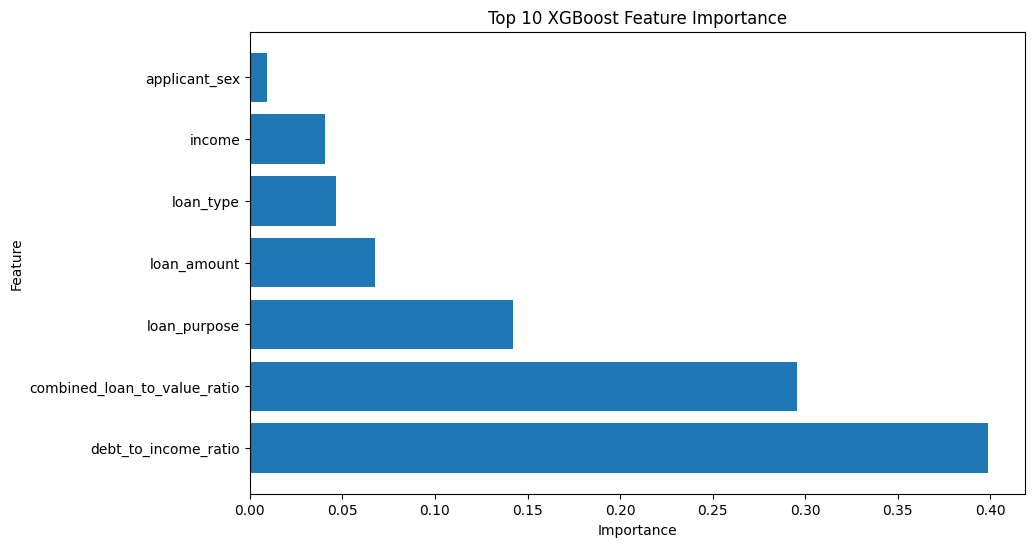

<Figure size 1000x600 with 0 Axes>

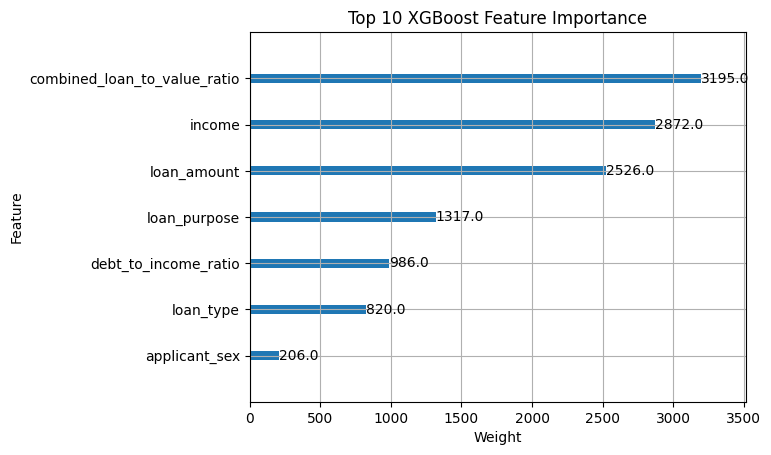

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Obtener la importancia de las variables
importances = XGB_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Visualizar las importancias de las 10 variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()

# También puedes usar la función plot_importance de XGBoost para crear un gráfico de barras
plt.figure(figsize=(10, 6))
plot_importance(XGB_model, importance_type='weight', xlabel='Weight', ylabel='Feature', title='Top 10 XGBoost Feature Importance')
plt.show()


In [ ]:
# Obtener la importancia de las variables
importances = XGB_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Imprimir las 10 variables más importantes y sus importancias
print("Top 10 Features:")
print(top_10_features[['Feature', 'Importance']])


Top 10 Features:
                        Feature  Importance
5          debt_to_income_ratio    0.398625
6  combined_loan_to_value_ratio    0.295330
3                  loan_purpose    0.141950
2                   loan_amount    0.067427
4                     loan_type    0.046794
0                        income    0.040396
1                 applicant_sex    0.009478


In [ ]:
# Obtener la importancia de las variables
importances = XGB_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Extraer solo el nombre base de las variables
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

# Agrupar por nombre de variable y sumar las importancias
feature_importance_df = feature_importance_df.groupby('Feature')['Importance'].sum().reset_index()

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Imprimir las 10 variables más importantes y sus importancias
print("Top 10 Features:")
print(top_10_features)


Top 10 Features:
     Feature  Importance
2       debt    0.398625
1   combined    0.295330
4       loan    0.256171
3     income    0.040396
0  applicant    0.009478


Analisis SHAP: SHAP proporciona una forma de asignar contribuciones a cada característica en una predicción de modelo.

In [ ]:
# Obtener importancias de características
feature_importances = XGB_model.feature_importances_

# Obtener nombres de características
feature_names = X_train.columns

# Diccionario para almacenar importancias de variables únicas
variable_importances = {}

# Sumar importancias de variables únicas
for i, feature in enumerate(feature_names):
    variable_name = feature.split('_')[0]  # Tomar el nombre de la variable sin detalles específicos
    if variable_name not in variable_importances:
        variable_importances[variable_name] = 0
    variable_importances[variable_name] += feature_importances[i]

# Ordenar las variables por importancia
sorted_variable_importances = dict(sorted(variable_importances.items(), key=lambda item: item[1], reverse=True))

# Imprimir las importancias de las variables
print("XGBoost Feature Importance:")
for variable, importance in sorted_variable_importances.items():
    print(f"{variable}: {importance}")


XGBoost Feature Importance:
debt: 0.3986251652240753
combined: 0.2953298091888428
loan: 0.2561710253357887
income: 0.040396008640527725
applicant: 0.009478027001023293


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.3 MB/s eta 0:00:00


# EXPLICABILIDAD CON SHAP

In [ ]:
import shap

# Crear un explainer SHAP con el modelo entrenado
explainer = shap.TreeExplainer(XGB_model)

# Calcular los valores SHAP para un conjunto de datos (por ejemplo, X_train)
shap_values = explainer.shap_values(X_train)


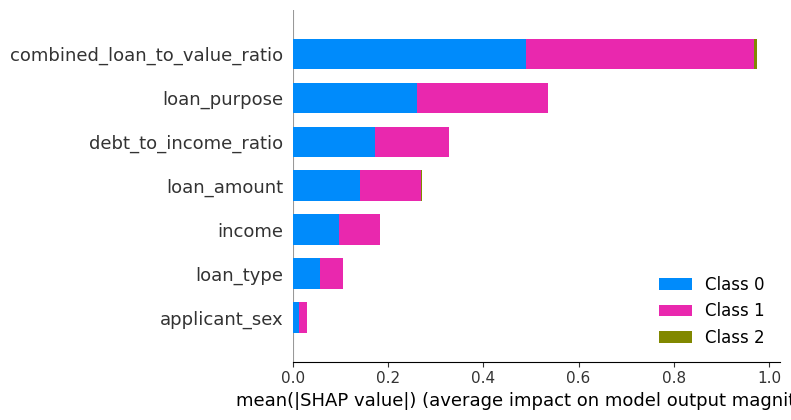

In [ ]:
# Obtener un resumen de valores SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar")


# EVALUACION DESEMPEÑO EN GRUPOS DE INTERÉS

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Codificar la variable objetivo 'action_taken2'
label_encoder_action_taken2 = LabelEncoder()
data['action_taken2_encoded'] = label_encoder_action_taken2.fit_transform(data['action_taken2'])

# Función para filtrar los datos según el grupo de interés
def filtrar_datos_para_grupo(grupo, data):
    if grupo == 'protegido_edad':
        return data[data['applicant_age_above_62'] == 1]
    elif grupo == 'no_protegido_edad':
        return data[data['applicant_age_above_62'] == 0]
    elif grupo == 'protegido_sexo':
        return data[data['applicant_sex'] != 'hombre']
    elif grupo == 'no_protegido_sexo':
        return data[data['applicant_sex'] == 'hombre']
    elif grupo == 'protegido_raza':
        return data[data['applicant_race_1'] != 'blanco']
    elif grupo == 'no_protegido_raza':
        return data[data['applicant_race_1'] == 'blanco']
    else:
        raise ValueError("Grupo de interés no válido")

# Definir los grupos de interés
grupos_interes = ['protegido_edad', 'no_protegido_edad', 'protegido_sexo', 'no_protegido_sexo', 'protegido_raza', 'no_protegido_raza']

# Definir las características numéricas y categóricas
numeric_features = ['loan_amount',
                    'income']
categorical_features = ['applicant_race_1', 'applicant_sex','loan_purpose', 'loan_type', 'lien_status', 'loan_amount']



# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Entrenar el modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)

# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken2', 'action_taken2_encoded'], axis=1)
    y_grupo = df_grupo['action_taken2_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    XGB_model.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = XGB_model.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.6270
Precision: 0.5942
Recall: 0.6270
F1 Score: 0.5525

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.6881
Precision: 0.6424
Recall: 0.6881
F1 Score: 0.6037

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.6670
Precision: 0.6298
Recall: 0.6670
F1 Score: 0.5861

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.6820
Precision: 0.6355
Recall: 0.6820
F1 Score: 0.5947

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.6300
Precision: 0.5981
Recall: 0.6300
F1 Score: 0.5637

Métricas de desempeño para el grupo no_protegido_raza:
Accuracy: 0.6916
Precision: 0.6447
Recall: 0.6916
F1 Score: 0.5980



In [ ]:
# Contar el número de observaciones en cada grupo filtrado
for grupo in grupos_interes:
    df_grupo = filtrar_datos_para_grupo(grupo, data)
    print(f"Grupo: {grupo}")
    print(f"Número de observaciones: {len(df_grupo)}")  # Contar el número de filas del DataFrame filtrado
    print()


Grupo: protegido_edad
Número de observaciones: 186660

Grupo: no_protegido_edad
Número de observaciones: 805782

Grupo: protegido_sexo
Número de observaciones: 331899

Grupo: no_protegido_sexo
Número de observaciones: 668101

Grupo: protegido_raza
Número de observaciones: 230854

Grupo: no_protegido_raza
Número de observaciones: 769146



# MODELO CON SUBMUESTRA BALANCEADA

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Aplicar submuestreo para balancear las clases
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Entrenar el modelo XGBoost en los datos submuestreados
XGB_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)
XGB_model.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_XGB = XGB_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
classification_rep_XGB = classification_report(y_test, y_pred_XGB)

# Imprimir métricas de rendimiento para XGBoost
print(f'XGB Accuracy: {accuracy_XGB}')
print(f'XGB Confusion Matrix:\n{conf_matrix_XGB}')
print(f'XGB Classification Report:\n{classification_rep_XGB}')


XGB Accuracy: 0.7907
XGB Confusion Matrix:
[[ 53614  15442]
 [ 26418 104526]]
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     69056
           1       0.87      0.80      0.83    130944

    accuracy                           0.79    200000
   macro avg       0.77      0.79      0.78    200000
weighted avg       0.80      0.79      0.79    200000



# ANALISIS DE DISCRIMINACION

Se usa la libreria AIF 360.

Statistical Parity Difference

Corresponde a la diferencia entre la probabilidad de pertenecer a la clase positiva dado que se pertenece a la clase protegida y la posibilidad de pertenecer a la clase positiva dado que se pertenece a la clase no protegida

Disparate Impact

In [ ]:
!pip install aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.8/229.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fairlearn to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.1 MB/s eta 0:00

In [ ]:
pip install git+https://github.com/dssg/aequitas.git

  Cloning https://github.com/dssg/aequitas.git to /tmp/pip-req-build-716400bi
  Running command git clone --filter=blob:none --quiet https://github.com/dssg/aequitas.git /tmp/pip-req-build-716400bi
  Resolved https://github.com/dssg/aequitas.git to commit 270da37287498414b80f2f0ca1cd1b52fe2607c5
  Preparing metadata (setup.py) ... done


In [ ]:
import pickle

# Guardar el modelo como un archivo pickle
with open("XGBOOST.pickle", "wb") as f:
    pickle.dump(XGB_model, f)
